# Q-Learning Test Case Prioritization - Data Fetching and Preprocessing
This notebook connects to Azure Cosmos DB, fetches test execution logs, and prepares data for Q-learning-based prioritization.

In [5276]:

import pandas as pd
from azure.cosmos import CosmosClient
from datetime import datetime
import numpy as np
import random
import matplotlib.pyplot as plt


# Cosmos DB Configuration
COSMOS_URI = "https://robotarm-cosmosdb.documents.azure.com:443/"
COSMOS_KEY = "XFTBU2Zs8inOM58z5ZDAlPyWxAoyqaZ8eYgEIocwOuQuLxsGzHukS6sdtDUE7RKyEOpaNsMIr7PVACDb0T8b5g=="
COSMOS_DB = "TestResultsDB"
COSMOS_CONTAINER = "Results"

# Initialize Cosmos DB client
client = CosmosClient(COSMOS_URI, credential=COSMOS_KEY)
database = client.get_database_client(COSMOS_DB)
container = database.get_container_client(COSMOS_CONTAINER)


In [5277]:

# Query all test results
query = "SELECT * FROM c"
items = list(container.query_items(query=query, enable_cross_partition_query=True))

# Parse and preprocess required fields
data = []
for item in items:
    data.append({
        "testCase_id": item.get("testCase", {}).get("id"),
        "testcase_name": item.get("testCase", {}).get("name") or item.get("testCaseTitle"),
        "duration_sec": round(item.get("durationInMs", 0) / 1000.0, 2),
        "status": item.get("outcome"),
        "agent": item.get("computerName"),
        "build_id": item.get("build", {}).get("id"),
        "release_id": item.get("releaseReference", {}).get("id"),
        "run_id": item.get("testRunId"),
        "failure_type": item.get("failureType"),
        "start_time": item.get("startedDate"),
        "end_time": item.get("completedDate"),
        "upload_time": item.get("uploadTimestamp")
    })


In [5278]:

# Load into DataFrame
df = pd.DataFrame(data)

# Preview data
print(" Execution Logs:")
df.head()


 Execution Logs:


,testCase_id,testcase_name,duration_sec,status,agent,build_id,release_id,run_id,failure_type,start_time,end_time,upload_time
0,17,RoboticPainter_FailsafeBlocksPainting {Autobot2},0.65,Passed,LAPTOP-ATOATJIH,34,77,144,None,2025-05-28T16:28:31.597Z,2025-05-28T16:28:32.243Z,2025-05-28T16:31:42.734460
1,18,HighPrecisionArm_BoundaryFailure {Autobot2},0.51,Passed,LAPTOP-ATOATJIH,34,77,144,None,2025-05-28T16:28:33.64Z,2025-05-28T16:28:34.147Z,2025-05-28T16:31:43.048369
2,19,ABBFlexiblePaintBot_LowEdgeCheck {Autobot2},1.79,Failed,LAPTOP-ATOATJIH,34,77,144,None,2025-05-28T16:28:34.147Z,2025-05-28T16:28:35.94Z,2025-05-28T16:31:43.080269
3,20,ABBPainterX_CycleStopWithError {Autobot2},60.00,Passed,LAPTOP-ATOATJIH,34,77,144,None,2025-05-28T16:28:35.943Z,2025-05-28T16:29:35.947Z,2025-05-28T16:31:43.095899
4,21,ABBIRB6000_MovementBoundaries {Autobot2},1.42,Passed,LAPTOP-ATOATJIH,34,77,144,None,2025-05-28T16:29:35.947Z,2025-05-28T16:29:37.37Z,2025-05-28T16:31:43.127066


In [5279]:
# List of columns to drop
columns_to_drop = ['agent', 'run_id', 'failure_type', 'build_id', 'release_id']

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

# Optional: verify result
print("✅ Remaining columns:")
print(df.columns.tolist())


✅ Remaining columns:
['testCase_id', 'testcase_name', 'duration_sec', 'status', 'start_time', 'end_time', 'upload_time']


In [5280]:
df.head(50)

,testCase_id,testcase_name,duration_sec,status,start_time,end_time,upload_time
0,17,RoboticPainter_FailsafeBlocksPainting {Autobot2},0.65,Passed,2025-05-28T16:28:31.597Z,2025-05-28T16:28:32.243Z,2025-05-28T16:31:42.734460
1,18,HighPrecisionArm_BoundaryFailure {Autobot2},0.51,Passed,2025-05-28T16:28:33.64Z,2025-05-28T16:28:34.147Z,2025-05-28T16:31:43.048369
2,19,ABBFlexiblePaintBot_LowEdgeCheck {Autobot2},1.79,Failed,2025-05-28T16:28:34.147Z,2025-05-28T16:28:35.94Z,2025-05-28T16:31:43.080269
3,20,ABBPainterX_CycleStopWithError {Autobot2},60.00,Passed,2025-05-28T16:28:35.943Z,2025-05-28T16:29:35.947Z,2025-05-28T16:31:43.095899
4,21,ABBIRB6000_MovementBoundaries {Autobot2},1.42,Passed,2025-05-28T16:29:35.947Z,2025-05-28T16:29:37.37Z,2025-05-28T16:31:43.127066
5,22,IndustrialPaintBot_ValidStop {Autobot2},0.11,Failed,2025-05-28T16:29:37.37Z,2025-05-28T16:29:37.48Z,2025-05-28T16:31:43.158816
6,23,PaintLineIRB_ValidPositioning {Autobot2},1.40,Failed,2025-05-28T16:28:32.243Z,2025-05-28T16:28:33.64Z,2025-05-28T16:31:43.190121
7,24,MotionSystemCheck_FailureDuringRun {Autobot2},120.01,Passed,2025-05-28T16:29:37.48Z,2025-05-28T16:31:37.49Z,2025-05-28T16:31:43.221341
8,25,CompactPaintBot_QuickTest {Autobot2},1.65,Passed,2025-05-28T16:31:37.493Z,2025-05-28T16:31:39.143Z,2025-05-28T16:31:43.258834
9,26,ABBPaintingBot_RecoveryFromCrash {Autobot2},30.02,Failed,2025-05-28T16:28:01.54Z,2025-05-28T16:28:31.563Z,2025-05-28T16:31:43.284064


In [5281]:
columns_to_check = ['testCase_id', 'testcase_name', 'duration_sec', 'status', 'start_time', 'end_time', 'upload_time']

# Show count of missing values in each column
missing_counts = df[columns_to_check].isnull().sum()
print("Missing values per column:")
print(missing_counts)


Missing values per column:
testCase_id       0
testcase_name     0
duration_sec      0
status           18
start_time        0
end_time          0
upload_time       0
dtype: int64


In [5282]:
# ✅ Step 1: Convert time columns to datetime and remove timezone
df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce').dt.tz_localize(None)
df['end_time'] = pd.to_datetime(df['end_time'], errors='coerce').dt.tz_localize(None)
df['upload_time'] = pd.to_datetime(df['upload_time'], errors='coerce').dt.tz_localize(None)

# ✅ Step 2: Sort and compute time since last run
df = df.sort_values(by=['testCase_id', 'upload_time'])
df['time_since_last_run'] = (
    df.groupby('testCase_id')['upload_time']
    .diff()
    .dt.total_seconds()
    .div(3600)
    .round(4)
)


In [5283]:
df['time_since_last_run'] = df['time_since_last_run'].fillna(0)



In [5284]:


# Sort by testCaseId and upload_time
df = df.sort_values(by=['testCase_id', 'upload_time'])

# Compute time since last run in hours
df['time_since_last_run'] = df.groupby('testCase_id')['upload_time'].diff()


In [5285]:
df = df[df["time_since_last_run"].notna()]


In [5286]:
df.head()

,testCase_id,testcase_name,duration_sec,status,start_time,end_time,upload_time,time_since_last_run
47,10,PaintProSystem_ResetPosition {Autobot1},0.69,Passed,2025-05-28 18:09:13.800,2025-05-28 18:09:14.490,2025-05-28 18:09:58.977880,0 days 00:27:50.214068
69,10,PaintProSystem_ResetPosition {Autobot1},1.20,Passed,2025-05-28 19:50:33.727,2025-05-28 19:50:34.927,2025-05-28 19:51:28.559985,0 days 01:41:29.582105
91,10,PaintProSystem_ResetPosition {Autobot1},1.46,Passed,2025-05-28 20:28:27.063,2025-05-28 20:28:28.520,2025-05-28 20:29:13.760958,0 days 00:37:45.200973
123,10,PaintProSystem_ResetPosition {Autobot1},0.34,Passed,2025-05-29 11:22:51.033,2025-05-29 11:22:51.373,2025-05-29 11:23:31.495226,0 days 14:54:17.734268
155,10,PaintProSystem_ResetPosition {Autobot1},1.50,Passed,2025-05-31 19:58:25.657,2025-05-31 19:58:27.160,2025-05-31 19:59:14.994027,2 days 08:35:43.498801


In [5287]:
# Step 1: Failure flag and rate
df['failure'] = df['status'] == 'Failed'
df['failure_rate'] = df.groupby('testcase_name')['failure'].transform('mean')

# Step 2: Encode test case names and status
df['testcase_encoded'] = df['testcase_name'].astype('category').cat.codes
df['status_encoded'] = df['status'].map({'Passed': 0, 'Failed': 1, 'Warning': 0.5}).fillna(0)

# Step 3: Time since last run in minutes
df['time_since_last_run_minutes'] = df['time_since_last_run'].dt.total_seconds() / 60

# Step 4: Normalize relevant features
df['normalized_time_last_run'] = (
    df['time_since_last_run_minutes'] - df['time_since_last_run_minutes'].min()
) / (df['time_since_last_run_minutes'].max() - df['time_since_last_run_minutes'].min())

df['normalized_duration'] = (
    df['duration_sec'] - df['duration_sec'].min()
) / (df['duration_sec'].max() - df['duration_sec'].min())

df['normalized_failure_rate'] = (
    df['failure_rate'] - df['failure_rate'].min()
) / (df['failure_rate'].max() - df['failure_rate'].min())

In [5288]:


# ✅ Define State Using Continuous Values
df['state'] = df[['normalized_failure_rate', 'normalized_time_last_run', 'normalized_duration']].apply(tuple, axis=1)

# ✅ Map State to Index
unique_states = list(set(df['state']))
state_to_index = {state: i for i, state in enumerate(unique_states)}
df['state_index'] = df['state'].map(state_to_index)


# ✅ Define Dynamic Reward Function with Weighted Influence
def compute_reward(row, action):
    high_risk = row['normalized_failure_rate'] > 0.3
    short_duration = row['normalized_duration'] < 0.5
    recent_execution = row['normalized_time_last_run'] < 0.3

    # Assign weights to each condition
    risk_weight = 0.5 if high_risk else 0
    duration_weight = 0.7 if short_duration else 0
    execution_weight = 0.4 if recent_execution else 0

    total_weight = risk_weight + duration_weight + execution_weight

    if action == 1:
        return 1 if total_weight > 0 else -0.5
    return -1 if total_weight > 0 else 0.2

# ✅ Initialize Q-table (state x action)
Q_table = np.zeros((len(unique_states), 2))

# ✅ Q-learning Parameters
alpha = 0.3  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 1.0  # Exploration rate
episodes = 10000  # Number of training iterations
episode_rewards = []

# ✅ Training Loop
for episode in range(episodes):
    row = df.sample(1).iloc[0]  # Randomly select a test case
    s_idx = row['state_index']

    # ✅ Softmax Exploration
    if random.uniform(0, 1) < epsilon:
        probabilities = np.exp(Q_table[s_idx]) / np.sum(np.exp(Q_table[s_idx]))
        a_idx = np.random.choice([0, 1], p=probabilities)
    else:
        a_idx = np.argmax(Q_table[s_idx])

    # ✅ Compute Reward
    reward = compute_reward(row, a_idx)
    old_value = Q_table[s_idx, a_idx]
    next_max = np.max(Q_table[s_idx])

    # ✅ Q-learning Update
    Q_table[s_idx, a_idx] = old_value + alpha * (reward + gamma * next_max - old_value)

    # ✅ Store Episode Rewards
    episode_rewards.append(reward)

    # ✅ Epsilon Decay for Balanced Exploration
    epsilon = max(0.01, epsilon * 0.999)








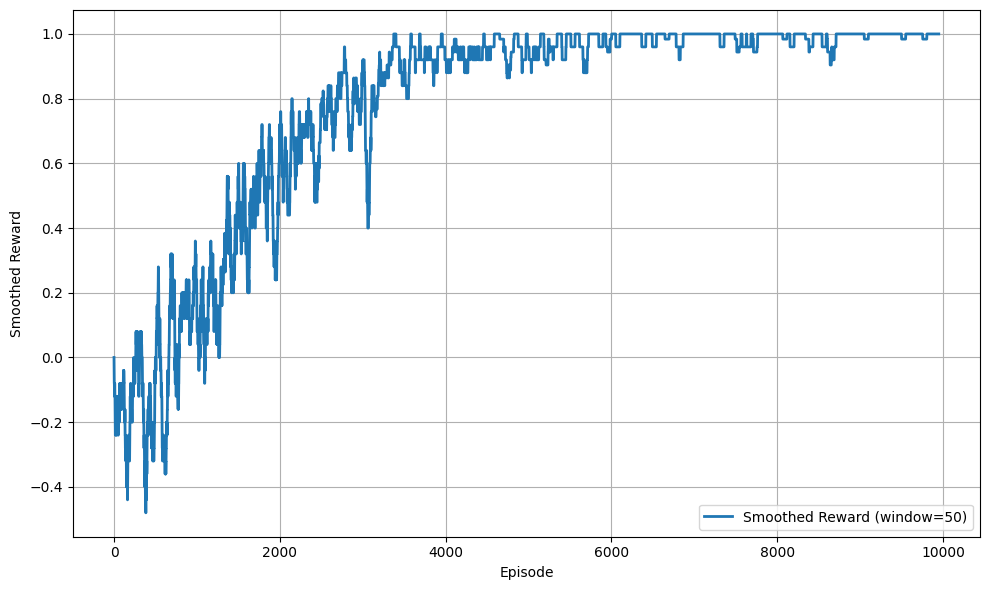

In [5289]:
# Smoothed reward plot function
def moving_average(data, window=50):
    return np.convolve(data, np.ones(window) / window, mode='valid')

# Compute and plot
smoothed = moving_average(episode_rewards)
smoothed_x = np.arange(len(smoothed))

plt.figure(figsize=(10, 6))
plt.plot(smoothed_x, smoothed, label='Smoothed Reward (window=50)', linewidth=2)
plt.xlabel("Episode")
plt.ylabel("Smoothed Reward")
plt.legend(loc='lower right')  # ✅ Bottom right placement
plt.grid(True)
plt.tight_layout()
plt.show()


In [5290]:
# ✅ Step 1: Add Q-value and reward for 'run' action
df["Q_value"] = df["state_index"].apply(lambda idx: Q_table[idx, 1])

# ✅ Step 2: Predict best action (0 = skip, 1 = run)
df["runDecision"] = df["state_index"].apply(lambda idx: np.argmax(Q_table[idx]))

# ✅ Step 3: Filter test cases where best action is 'run'
selected_tests = df[df["runDecision"] == 1].copy()

# ✅ Step 4: Ensure reward is present before sorting
selected_tests = selected_tests.sort_values(by="Q_value", ascending=False)

# ✅ Step 5: Drop duplicates by `testcase_name`
selected_tests = selected_tests.drop_duplicates(subset="testcase_name", keep="first")

# ✅ Step 6: Set `testCase_id` as index (if available)
#if "testCase_id" in selected_tests.columns:
   # selected_tests.set_index("testCase_id", inplace=True)
selected_tests.reset_index(inplace=True)


# ✅ Step 7: Save selected test cases to CSV
selected_tests.to_csv("CosmosDB/scheduled_tests_qlearning.csv")

# ✅ Step 8: Display results 
print("\n📊 Q-Learning Selected Test Cases:")
print(selected_tests[[
    "testCase_id",
    "testcase_name",
    "Q_value",
    "duration_sec",
    "time_since_last_run"
]].head(32))

print("\n✅ Saved to: CosmosDB/scheduled_tests_qlearning.csv")



📊 Q-Learning Selected Test Cases:
   testCase_id                                     testcase_name   Q_value  \
0           11            PaintBotEdgeTolerance_Check {Autobot1}  4.562057   
1           12          PaintBotFaultyMove_ShouldFail {Autobot1}  4.562057   
2            6          PaintIRB5500_ResetAfterFailure{Autobot1}  4.562057   
3            8                     ABB5000_PaintCycle {Autobot1}  4.220487   
4            9        ABBPaintBot_TriggerFailsafeFlow {Autobot1}  4.041740   
5           15             RoboticPaintX_MoveAndSpray {Autobot1}  4.041740   
6           20         ABBPainterX_CycleStopWithError {Autobot2}  3.857463   
7           24     MotionSystemCheck_FailureDuringRun {Autobot2}  3.857463   
8           36            SimPaintRobot_ResetSequence {Autobot3}  3.857463   
9           33         SmartPainter_PositionPrecision {Autobot3}  3.667488   
10          18       HighPrecisionArm_BoundaryFailure {Autobot2}  3.471637   
11          19       ABBFlexi

In [5291]:
# Total number of test cases
total_tests = len(df)

# 0.3% of total test cases
top_k = int(total_tests * 0.003)

# Step 1: Assign Q-value from action=1
df["Q_value"] = df["state_index"].apply(lambda idx: Q_table[idx, 1])

# Step 2: Predict best action
df["runDecision"] = df["state_index"].apply(lambda idx: np.argmax(Q_table[idx]))

# Step 3: Keep only those where action = run
run_candidates = df[df["runDecision"] == 1].copy()

# Step 4: Sort by Q-value descending
run_candidates = run_candidates.sort_values(by="Q_value", ascending=False)

# Step 5: Drop duplicates (optional, depending on your needs)
run_candidates = run_candidates.drop_duplicates(subset="testcase_name", keep="first")

# ✅ Step 6: Select top 0.3% by Q-value
selected_tests = run_candidates.head(top_k)

# Step 7: Reset index and save to CSV
selected_tests.reset_index(drop=True, inplace=True)
selected_tests.to_csv("CosmosDB/scheduled_tests_qlearning.csv", index=False)


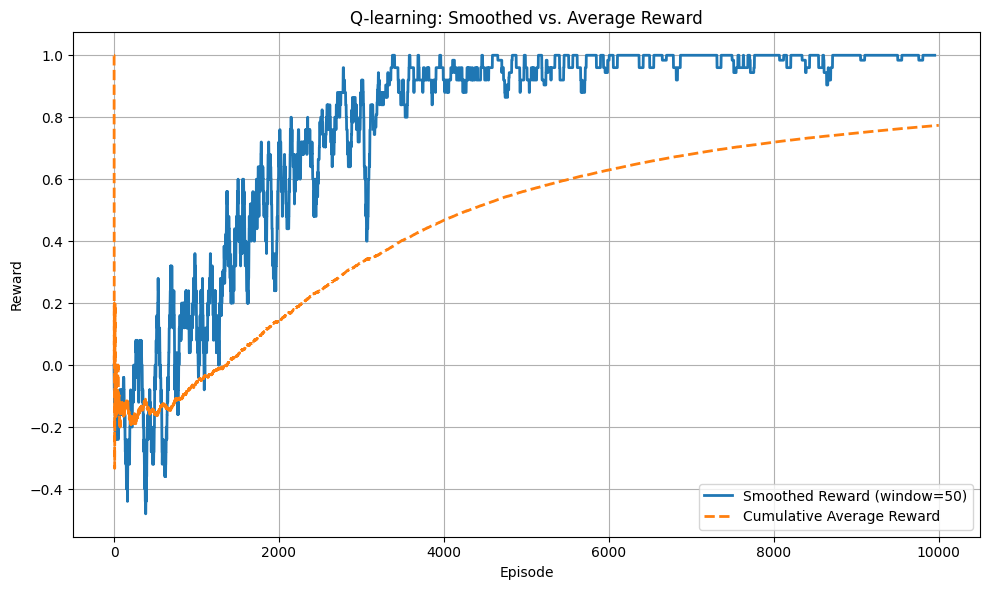

In [5292]:
# Calculate smoothed and average reward
smoothed = moving_average(episode_rewards)
average_reward = np.cumsum(episode_rewards) / np.arange(1, len(episode_rewards) + 1)

# Align x-axes
smoothed_x = np.arange(len(smoothed))
avg_x = np.arange(len(average_reward))

# Create combined plot
plt.figure(figsize=(10, 6))
plt.plot(smoothed_x, smoothed, label='Smoothed Reward (window=50)', linewidth=2)
plt.plot(avg_x, average_reward, label='Cumulative Average Reward', linestyle='--', linewidth=2)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Q-learning: Smoothed vs. Average Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


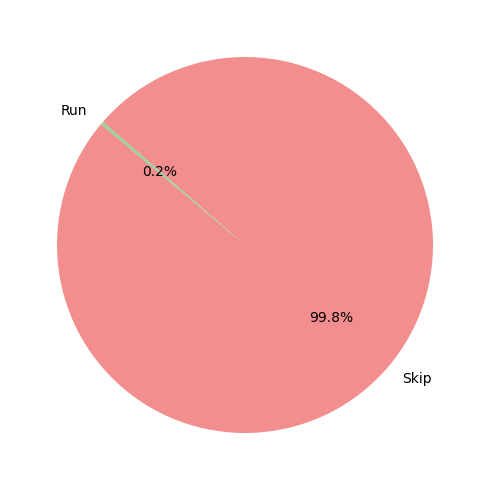

In [5293]:
import matplotlib.pyplot as plt

# Assuming you already have df['runDecision'] = 0 or 1
run_counts = df['runDecision'].value_counts()
labels = ['Skip', 'Run']
colors = ['#f28e8e', '#8fd694']

plt.figure(figsize=(5, 5))
plt.pie(run_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)

plt.tight_layout()
plt.show()


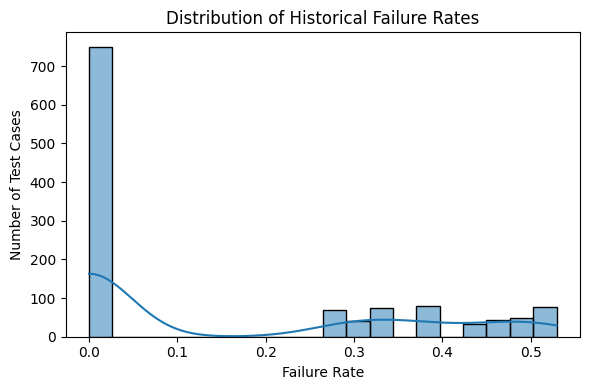

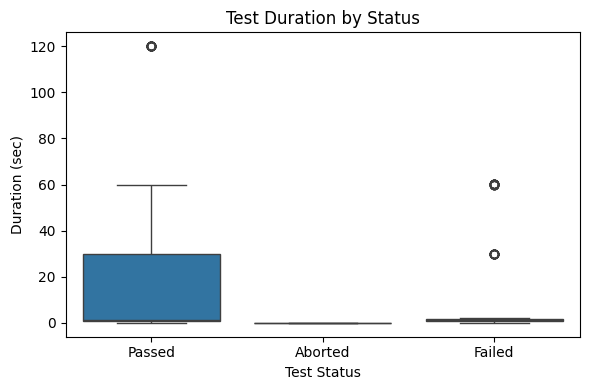

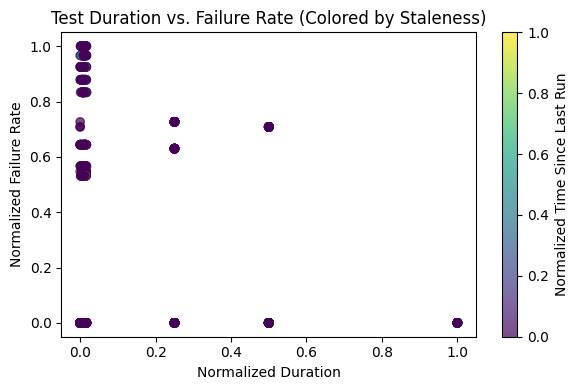

In [5294]:
# Re-import packages and load user's actual 'df' if it was previously defined
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate loading user's data from the last known structure (assuming df already exists in memory with correct columns)
# Plot 1: Histogram with KDE of failure_rate
plt.figure(figsize=(6, 4))
sns.histplot(df['failure_rate'], bins=20, kde=True, edgecolor='black')
plt.title('Distribution of Historical Failure Rates')
plt.xlabel('Failure Rate')
plt.ylabel('Number of Test Cases')
plt.tight_layout()


# Plot 2: Box-and-whisker plot of duration_sec grouped by status
plt.figure(figsize=(6, 4))
sns.boxplot(x='status', y='duration_sec', data=df)
plt.title('Test Duration by Status')
plt.xlabel('Test Status')
plt.ylabel('Duration (sec)')
plt.tight_layout()


# Plot 3: Scatter plot of normalized_duration × normalized_failure_rate, colored by normalized_time_last_run
plt.figure(figsize=(6, 4))
scatter = plt.scatter(
    df['normalized_duration'],
    df['normalized_failure_rate'],
    c=df['normalized_time_last_run'],
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(scatter, label='Normalized Time Since Last Run')
plt.title('Test Duration vs. Failure Rate (Colored by Staleness)')
plt.xlabel('Normalized Duration')
plt.ylabel('Normalized Failure Rate')
plt.tight_layout()



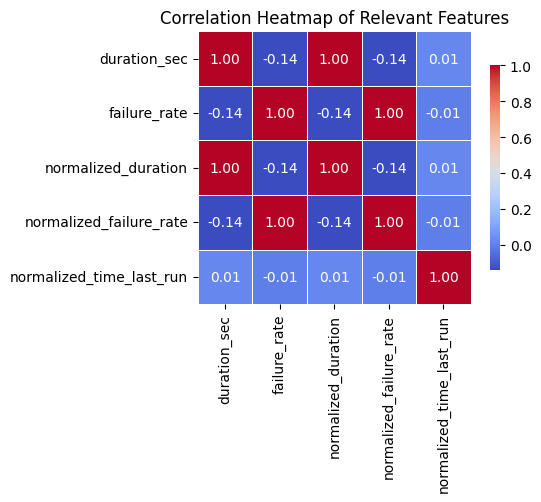

In [5295]:
# Include additional relevant features for the heatmap
relevant_features = df[[
    'duration_sec',
    'failure_rate',
    'normalized_duration',
    'normalized_failure_rate',
    'normalized_time_last_run',
    
]]

# Compute correlation matrix
correlation_matrix_extended = relevant_features.corr()

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix_extended, annot=True, cmap='coolwarm', fmt=".2f", square=True,
            cbar_kws={"shrink": .75}, linewidths=0.5)
plt.title('Correlation Heatmap of Relevant Features')
plt.tight_layout()



In [5296]:
from rich.console import Console
from rich.table import Table
from prettytable import PrettyTable

# ✅ Create a Rich Console for colored output
console = Console()

# ✅ Define a Rich table with color formatting
rich_table = Table(title="📊 Q-Learning Prioritized Test Cases", show_lines=True)

# ✅ Add colored headers (including `testCase_id`)
rich_table.add_column("Test Case ID", style="bold white", justify="center")
rich_table.add_column("Test Case Name", style="cyan", justify="left")
rich_table.add_column("Q Value", style="magenta", justify="center")
rich_table.add_column("Duration (sec)", style="yellow", justify="center")
rich_table.add_column("Time Since Last Run", style="green", justify="center")

# ✅ Populate Rich Table with data
for _, row in selected_tests.head(32).iterrows():
    rich_table.add_row(
        str(row["testCase_id"]),
        str(row["testcase_name"]),
        f"[bold magenta]{row['Q_value']:.4f}[/bold magenta]",
        f"[bold yellow]{row['duration_sec']:.2f}[/bold yellow]",
        f"[bold green]{row['time_since_last_run']}[/bold green]"
    )

# ✅ Print the formatted Rich Table
console.print(rich_table)

# ✅ Create a PrettyTable for structured display
pretty_table = PrettyTable()
pretty_table.field_names = ["Test Case ID", "Test Case Name", "Q Value", "Duration (sec)", "Time Since Last Run"]

# ✅ Customize alignment
pretty_table.align["Test Case ID"] = "c"
pretty_table.align["Test Case Name"] = "l"
pretty_table.align["Q Value"] = "c"
pretty_table.align["Duration (sec)"] = "c"
pretty_table.align["Time Since Last Run"] = "c"

# ✅ Add rows to PrettyTable
for _, row in selected_tests.head(20).iterrows():
    pretty_table.add_row([
        str(row["testCase_id"]),
        row["testcase_name"], 
        f"{row['Q_value']:.4f}", 
        f"{row['duration_sec']:.2f}", 
        str(row["time_since_last_run"])
    ])

# ✅ Print PrettyTable
print("\n📊 Q-Learning Selected Test Cases (Structured View):")
print(pretty_table)


                                     📊 Q-Learning Prioritized Test Cases                                      
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Test Case ID ┃ Test Case Name                           ┃ Q Value ┃ Duration (sec) ┃  Time Since Last Run   ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│      11      │ PaintBotEdgeTolerance_Check {Autobot1}   │ 4.5621  │      0.00      │ 0 days 02:15:10.238103 │
├──────────────┼──────────────────────────────────────────┼─────────┼────────────────┼────────────────────────┤
│      12      │ PaintBotFaultyMove_ShouldFail {Autobot1} │ 4.5621  │      0.00      │ 0 days 02:15:10.238103 │
├──────────────┼──────────────────────────────────────────┼─────────┼────────────────┼────────────────────────┤
│      6       │ PaintIRB5500_ResetAfterFailure{Autobot1} │ 4.5621  │      0.24      │ 0 days 01:22:37.498084 │
└──────────────┴──────────────────────────────────────────┴─────────┴────────────────┴────────────────────────┘


📊 Q-Learning Selected Test Cases (Structured View):
+--------------+------------------------------------------+---------+----------------+------------------------+
| Test Case ID | Test Case Name                           | Q Value | Duration (sec) |  Time Since Last Run   |
+--------------+------------------------------------------+---------+----------------+------------------------+
|      11      | PaintBotEdgeTolerance_Check {Autobot1}   |  4.5621 |      0.00      | 0 days 02:15:10.238103 |
|      12      | PaintBotFaultyMove_ShouldFail {Autobot1} |  4.5621 |      0.00      | 0 days 02:15:10.238103 |
|      6       | PaintIRB5500_ResetAfterFailure{Autobot1} |  4.5621 |      0.24      | 0 days 01:22:37.498084 |
+--------------+------------------------------------------+---------+----------------+------------------------+
